<a href="https://colab.research.google.com/github/allicodi/bsta001_final/blob/main/BSTA_001_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats
import datetime

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
caseData = pd.read_csv('https://covidtracking.com/data/download/all-states-history.csv')

In [16]:
policyData_raw = pd.read_csv('/content/drive/My Drive/COVID-19_policy.csv') #NOTE NORA - I had to change this to match my drive, you'll have to change back next time you run
# /content/drive/My Drive/BSTA001/covid_policy_data_11_3_2020.csv #for alli
# /content/drive/My Drive/COVID-19_policy.csv # for nora
policyData = policyData_raw[4:55] #the postcodes (state Abbrev) are not alphabetical

In [17]:
policyData.head()

,STATE,POSTCODE,FIPS,STEMERG,CLSCHOOL,CLDAYCR,OPNCLDCR,CLNURSHM,STAYHOME,STAYHOMENOGP,END_STHM,CLBSNS,END_BSNS,RELIGEX,FM_ALL,FMFINE,FMCITE,FMNOENF,FM_EMP,FM_END,FM_STP,ALCOPEN,ALCREST,ALCDELIV,GUNOPEN,CLREST,ENDREST,RSTOUTDR,CLGYM,ENDGYM,CLMOVIE,END_MOV,CLOSEBAR,END_BRS,END_HAIR,END_RELG,ENDRETL,BCLBAR2,CLBAR2,CLMV2,...,UICLDCR,UIEXTND,UIMAXAMT,UIMAXEXT,UIMAXDUR,UIMAXCAR,UIMINBP,UIQTRNEED,UIOUTHQBP,UIREQBPL2Q,UIBPEARN300,UITAXWA,UIMINTAXR,UIMAXTAXR,UIAVGBFTAUG,LMABRN,TLHlBUPR,EXTOPFL,HMDLVOP,TLHLCL24,EXCEMORP,WVDEAREQ,PDSKLV,MEDEXP,POPDEN18,POP18,SQML,HMLS19,UNEMP18,POV18,RISKCOV,DEATH18,MH19,VBMEXC,VBMSIG,VBMPERM,VBMAUTOBAL,VBMAUTOAP,VBMGENELEC,Unnamed: 162
4,Alabama,AL,1,3/13/20,3/20/20,3/20/20,5/23/20,3/19/20,4/4/20,0,4/30/20,3/28/20,4/30/20,0,7/16/20,0,0,1,5/11/20,0,0,1,3/24/20,3/24/20,1,3/19/20,5/11/20,0,3/28/20,5/11/20,3/28/20,5/22/20,3/19/20,5/11/20,5/11/20,5/11/20,4/30/20,0,0,0,...,0,0,275,875,20,39,2340,2,780,0,Max Benefit < $300,8000,0.65,6.8,$250.77,1,0,0,0,3/20/20,0,0,0,0,93.24,4887871,52420,"3,261",5.6,16.8,43.1,"54,352",100.7,0,1,0,0,0,10/29/20,NaN
5,Alaska,AK,2,3/11/20,3/16/20,0,0,0,3/28/20,0,4/24/20,3/24/20,4/24/20,0,4/24/20,1,1,0,4/24/20,5/22/20,0,1,3/17/20,3/17/20,1,3/18/20,4/24/20,0,3/18/20,5/8/20,3/18/20,5/8/20,3/18/20,5/8/20,4/24/20,5/8/20,4/24/20,0,0,0,...,1,0,370,970,26,39,2500,2,250,0,13636.36,41500,1,5.4,$443.23,1,0,0,0,0,0,0,0,1,1.11,737438,665384,"1,907",6.8,10.9,32.8,"4,453",429.9,0,1,0,0,2,10/24/20,NaN
6,Arizona,AZ,4,3/11/20,3/16/20,0,0,0,3/31/20,0,5/16/20,3/31/20,5/8/20,1,0,0,0,0,5/8/20,0,3/30/20,1,3/19/20,3/19/20,1,3/21/20,5/11/20,0,3/21/20,5/13/20,3/21/20,5/16/20,3/21/20,5/16/20,5/8/20,0,5/8/20,6/29/20,6/29/20,6/29/20,...,1,0,240,840,26,39,7020,2,2340,0,Max Benefit < $300,7000,0.05,12.85,$237.99,0,0,0,0,0,3/11/20,0,1,1,62.91,7171646,113990,"10,007",5.4,14,39.1,"59,282",132.9,0,0,0,0,0,10/23/20,NaN
7,Arkansas,AR,5,3/11/20,3/17/20,0,0,3/13/20,0,0,0,4/6/20,5/4/20,0,7/20/20,1,1,0,5/11/20,0,0,1,3/19/20,3/19/20,1,3/20/20,5/11/20,0,3/20/20,5/4/20,3/20/20,5/18/20,3/20/20,5/19/20,5/6/20,0,5/18/20,0,0,0,...,0,0,451,1051,16,33,2835,2,1,0,31200,7000,0.1,6,$223.84,1,0,0,0,0,0,0,0,1,56.67,3013825,53179,"2,717",4.5,17.2,43.5,"32,336",231.6,0,0,0,0,0,10/27/20,NaN
8,California,CA,6,3/4/20,3/23/20,0,0,0,3/19/20,0,0,3/19/20,5/8/20,0,6/18/20,0,0,1,5/5/20,0,0,1,3/19/20,3/19/20,0,3/16/20,5/18/20,0,3/19/20,0,3/19/20,0,3/16/20,0,8/28/20,5/25/20,5/8/20,0,0,7/13/20,...,0,0,450,1050,26,39,1125,2,225,0,6900,7000,1.5,6.2,$282.35,0,0,0,0,0,0,0,1,1,241.65,39557045,163695,"151,278",5.5,12.8,33.3,"268,818",356.2,0,0,0,1,0,0,NaN


In [18]:
caseData.head()

,date,state,dataQualityGrade,death,deathConfirmed,deathIncrease,deathProbable,hospitalized,hospitalizedCumulative,hospitalizedCurrently,hospitalizedIncrease,inIcuCumulative,inIcuCurrently,negative,negativeIncrease,negativeTestsAntibody,negativeTestsPeopleAntibody,negativeTestsViral,onVentilatorCumulative,onVentilatorCurrently,positive,positiveCasesViral,positiveIncrease,positiveScore,positiveTestsAntibody,positiveTestsAntigen,positiveTestsPeopleAntibody,positiveTestsPeopleAntigen,positiveTestsViral,recovered,totalTestEncountersViral,totalTestEncountersViralIncrease,totalTestResults,totalTestResultsIncrease,totalTestsAntibody,totalTestsAntigen,totalTestsPeopleAntibody,totalTestsPeopleAntigen,totalTestsPeopleViral,totalTestsPeopleViralIncrease,totalTestsViral,totalTestsViralIncrease
0,2020-12-02,AK,A,122.0,122.0,0,NaN,768.0,768.0,164.0,19,NaN,NaN,992112.0,5318,NaN,NaN,984058.0,NaN,23.0,32531.0,NaN,697,0,NaN,NaN,NaN,NaN,39543.0,7165.0,NaN,0,1024643.0,6015,NaN,NaN,NaN,NaN,NaN,0,1024643.0,6015
1,2020-12-02,AL,A,3711.0,3326.0,73,385.0,25821.0,25821.0,1801.0,211,2252.0,NaN,1390351.0,6546,NaN,NaN,NaN,1298.0,NaN,256828.0,213172.0,3928,0,NaN,NaN,NaN,NaN,NaN,168387.0,NaN,0,1603523.0,9681,NaN,NaN,73187.0,NaN,1603523.0,9681,NaN,0
2,2020-12-02,AR,A+,2522.0,2312.0,10,210.0,9110.0,9110.0,1088.0,89,NaN,393.0,1562561.0,10306,NaN,NaN,1562561.0,1002.0,186.0,161521.0,140705.0,2212,0,NaN,3300.0,NaN,25241.0,NaN,142600.0,NaN,0,1703266.0,11813,NaN,21856.0,NaN,144866.0,NaN,0,1703266.0,11813
3,2020-12-02,AS,D,0.0,NaN,0,NaN,NaN,NaN,NaN,0,NaN,NaN,1988.0,0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1988.0,0,NaN,NaN,NaN,NaN,NaN,0,1988.0,0
4,2020-12-02,AZ,A+,6739.0,6237.0,52,502.0,26312.0,26312.0,2699.0,240,NaN,642.0,1957887.0,12811,NaN,NaN,NaN,NaN,386.0,340979.0,330317.0,3840,0,NaN,NaN,NaN,NaN,NaN,53694.0,NaN,0,2288204.0,16290,365871.0,NaN,NaN,NaN,2288204.0,16290,NaN,0


In [19]:
caseData['date'] = caseData['date'].astype('datetime64[ns]') #converts date attribute from string type to datetime type to be used for calculations

#gather dates of face mask mandates and their respective states
dateOfFM = policyData.FM_ALL 
stateOfFM = policyData.POSTCODE 

dateOfFM = pd.to_datetime(dateOfFM, errors = 'coerce') #converts date face mask mandate implemented from string type to datetime type to be used for calculations

In [20]:
caseData.info() #look at types and verify datetime conversion worked

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15409 entries, 0 to 15408
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   date                              15409 non-null  datetime64[ns]
 1   state                             15409 non-null  object        
 2   dataQualityGrade                  14148 non-null  object        
 3   death                             14583 non-null  float64       
 4   deathConfirmed                    6718 non-null   float64       
 5   deathIncrease                     15409 non-null  int64         
 6   deathProbable                     4996 non-null   float64       
 7   hospitalized                      9282 non-null   float64       
 8   hospitalizedCumulative            9282 non-null   float64       
 9   hospitalizedCurrently             12304 non-null  float64       
 10  hospitalizedIncrease              15409 non-nu

In [21]:
#keeping only necessary columns

dataFinal = caseData[['date', 'state', 'positiveIncrease']]
#dataFinal = caseData.drop(['dataQualityGrade' , 'death' ,	'deathConfirmed', 	'deathIncrease' ,	'deathProbable' ,	'hospitalized'	,'hospitalizedCumulative'	,'hospitalizedCurrently'	,'hospitalizedIncrease'	,'inIcuCumulative'	,'inIcuCurrently'	,'negative'	,'negativeIncrease'	,'negativeTestsAntibody'	,'negativeTestsPeopleAntibody',	'negativeTestsViral',	'onVentilatorCumulative'	,'onVentilatorCurrently'	,'positive'	,'positiveCasesViral', 'positiveScore'	,'positiveTestsAntibody'	,'positiveTestsAntigen'	,'positiveTestsPeopleAntibody'	,'positiveTestsPeopleAntigen'	,'positiveTestsViral'	,'recovered'	,'totalTestEncountersViral'	,'totalTestEncountersViralIncrease'	,'totalTestResults'	,'totalTestResultsIncrease'	,'totalTestsAntibody'	,'totalTestsAntigen'	,'totalTestsPeopleAntibody',	'totalTestsPeopleAntigen'	,'totalTestsPeopleViral'	,'totalTestsPeopleViralIncrease'	,'totalTestsViral'	,'totalTestsViralIncrease'], axis = 1)
dataFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15409 entries, 0 to 15408
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              15409 non-null  datetime64[ns]
 1   state             15409 non-null  object        
 2   positiveIncrease  15409 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 361.3+ KB


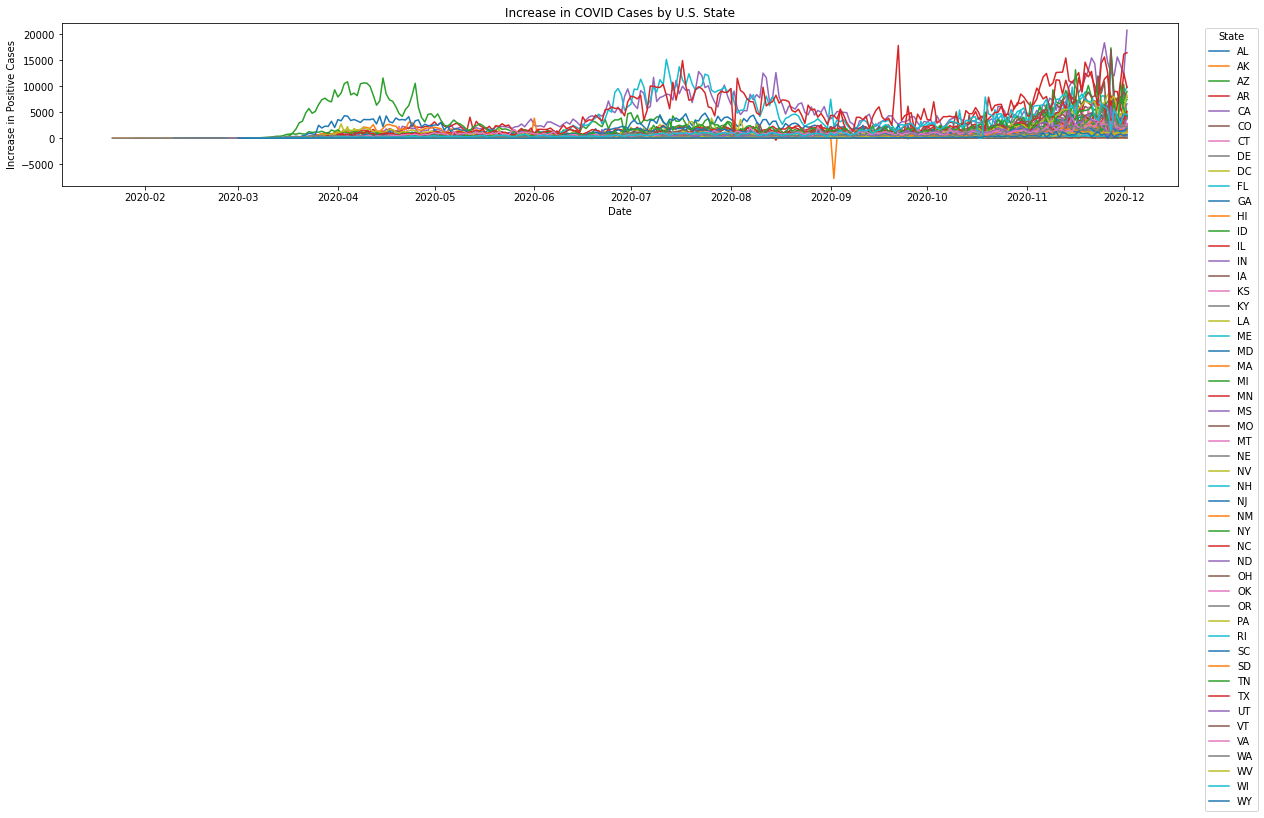

In [22]:
#redid to make code more concise and graph easier to read

#question for prof m - how to change legend so no color repeats (use dashed lines, etc.)

fig, ax = plt.subplots(figsize=(20,3))

casesByState = []

stateAbbrev = policyData.POSTCODE

for state in stateAbbrev: # for loop for separating case data by state
  stateCases = dataFinal.loc[dataFinal['state'] == state] 
  casesByState.append(stateCases)
  #graph of state case increases over time
  x = stateCases.date
  y = stateCases.positiveIncrease
  ax.plot(x, y, label=state)
  
ax.set_title('Increase in COVID Cases by U.S. State')
ax.set_xlabel('Date')
ax.set_ylabel('Increase in Positive Cases')
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='State')
plt.show()

In [23]:
#data needs cleaning, one state has greater than -5000 pos. inc, pretty sure it's NM

In [24]:
FMdf = pd.DataFrame({'FM_ALL':dateOfFM, 'State':stateOfFM}) #making data frame of face mask mandates

for col in FMdf.columns: #checking column titles
  print(col)

print(FMdf)

FM_ALL
State
       FM_ALL State
4  2020-07-16    AL
5  2020-04-24    AK
6         NaT    AZ
7  2020-07-20    AR
8  2020-06-18    CA
9  2020-07-16    CO
10 2020-04-20    CT
11 2020-04-28    DE
12 2020-04-17    DC
13        NaT    FL
14        NaT    GA
15 2020-04-16    HI
16        NaT    ID
17 2020-05-01    IL
18 2020-07-27    IN
19        NaT    IA
20 2020-07-03    KS
21 2020-05-11    KY
22        NaT    LA
23 2020-05-01    ME
24 2020-04-18    MD
25 2020-05-06    MA
26 2020-04-27    MI
27 2020-07-24    MN
28 2020-08-05    MS
29        NaT    MO
30        NaT    MT
31        NaT    NE
32 2020-06-26    NV
33        NaT    NH
34 2020-04-08    NJ
35 2020-05-15    NM
36 2020-04-17    NY
37 2020-06-26    NC
38        NaT    ND
39 2020-07-23    OH
40        NaT    OK
41 2020-07-01    OR
42 2020-07-01    PA
43 2020-04-18    RI
44        NaT    SC
45        NaT    SD
46        NaT    TN
47 2020-07-03    TX
48 2020-04-10    UT
49 2020-08-01    VT
50 2020-05-29    VA
51 2020-06-26    WA
52 2020

In [25]:
beforeDate = []
afterDateBegin = []
afterDateEnd = []

for date in FMdf.FM_ALL:  #calculate two week periods before and after mandate implementation
  beforeDate.append(date - datetime.timedelta(days=14))
  afterDateBegin.append(date + datetime.timedelta(days=14))
  afterDateEnd.append(date + datetime.timedelta(days=28))

  
FMdf['TwoWksBefore'] = beforeDate
FMdf['TwoWksAfter'] = afterDateBegin
FMdf['FourWksAfter'] = afterDateEnd

FMdf.head()  

,FM_ALL,State,TwoWksBefore,TwoWksAfter,FourWksAfter
4,2020-07-16,AL,2020-07-02,2020-07-30,2020-08-13
5,2020-04-24,AK,2020-04-10,2020-05-08,2020-05-22
6,NaT,AZ,NaT,NaT,NaT
7,2020-07-20,AR,2020-07-06,2020-08-03,2020-08-17
8,2020-06-18,CA,2020-06-04,2020-07-02,2020-07-16


In [26]:
avgCasesBefore = []
avgCasesAfter = []

for i in FMdf.index: #cycle through all states and calculate avg increase over time frame
  positiveIncrease = []
  state = FMdf['State'][i] # get state at index
  data = dataFinal.loc[dataFinal['state'] == state] #get policy data associated with state
  
  before = data.loc[(data.date>=FMdf['TwoWksBefore'][i]) & (data.date<=FMdf['FM_ALL'][i]),:].positiveIncrease #data from two week period before policy implemented
  after = data.loc[(data.date >= FMdf['TwoWksAfter'][i]) & (data.date<=FMdf['FourWksAfter'][i]),:].positiveIncrease #data from two week period after policy implemented
  
  avgCasesBefore.append(np.mean(before)) #calc averages
  avgCasesAfter.append(np.mean(after))

FMdf['avgCasesBefore'] = avgCasesBefore #add list of averages to the dataframe
FMdf['avgCasesAfter'] = avgCasesAfter

In [27]:
FMdf.head()

,FM_ALL,State,TwoWksBefore,TwoWksAfter,FourWksAfter,avgCasesBefore,avgCasesAfter
4,2020-07-16,AL,2020-07-02,2020-07-30,2020-08-13,1475.066667,1451.666667
5,2020-04-24,AK,2020-04-10,2020-05-08,2020-05-22,6.933333,2.133333
6,NaT,AZ,NaT,NaT,NaT,NaN,NaN
7,2020-07-20,AR,2020-07-06,2020-08-03,2020-08-17,714.533333,660.266667
8,2020-06-18,CA,2020-06-04,2020-07-02,2020-07-16,2894.133333,8002.600000


In [68]:
statesWithPolicies = [FMdf['State'][i] for i in FMdf.index if str(FMdf['FM_ALL'][i]) != 'NaT'] #might use this to eliminate states w/o policy from graph below, still have to implement
print(statesWithPolicies)
len(statesWithPolicies)

['AL', 'AK', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'HI', 'IL', 'IN', 'KS', 'KY', 'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'NV', 'NJ', 'NM', 'NY', 'NC', 'OH', 'OR', 'PA', 'RI', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI']


35

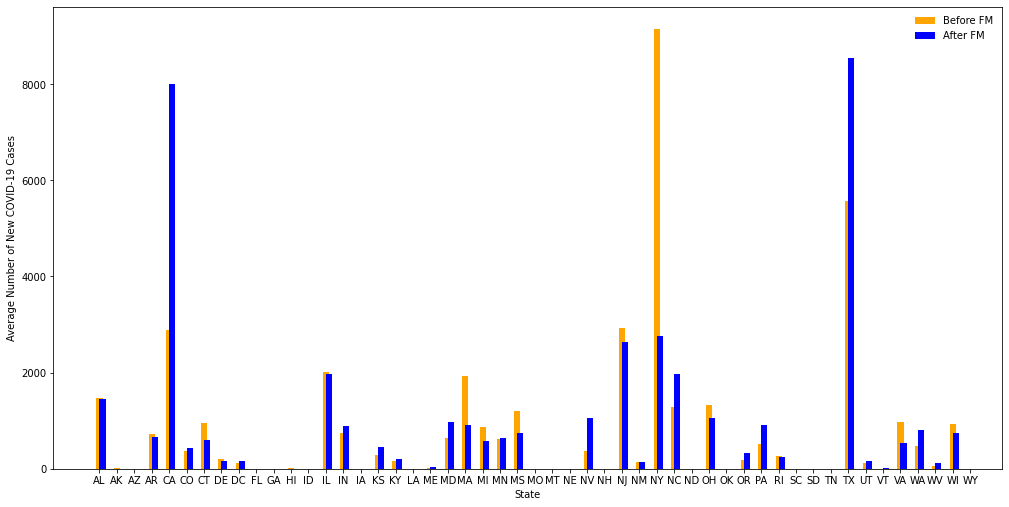

In [29]:
#plot data
from matplotlib.pyplot import figure

width = 0.35  #width of bars

fig, ax = plt.subplots()
rects1 = ax.bar(FMdf.State, FMdf.avgCasesBefore, width, align= 'center', color='orange', label='Before FM')
rects2 = ax.bar(FMdf.State, FMdf.avgCasesAfter, width, align= 'edge', color='blue', label='After FM')
ax.set_ylabel('Average Number of New COVID-19 Cases')
ax.set_xlabel('State')
ax.set_xticklabels(FMdf.State)
ax.legend(frameon=False)
fig.set_size_inches(17, 8.5, forward=True)

**Things to do:**


*   Pick/use statistical test(s)



1.   Hypothesis test for two week period around face mask policy implementation - Paired T-Test

  *   H0 : policy does not impact average increase in cases(after - before = 0 )
  *   H1 : policy decreases average increase in cases (after - before <= 0)

2.    Chi-Squared Test/2x2 Table - states with fines x states with criminal charges (FMFINE vs FMCITE) 
  *   Shows differences in behavior enforcement - is some policy more effective than others?
  *   Treat increase or decrease as 0/1
  *   Fines vs Not fines - states increase vs decrease
  *   Fines vs Citations - states increase vs decrease

3.    Linear regression for behavior vs avg increase in number of cases
  *   X = 0 for citation, X = 1 for fines
  *   Y = average two weeks after

**Future Directions:**
*   Look at other variables w/ dates
    * Bar shutdown, school shutdown, restaurant reopen, religious gatherings limited
    * Bar reopen, school reopen, restaurant reopen, religious gatherings reopen
*   Look at FM related variables
    * FM mandate enforced by fines, FM mandate enforced by criminal charge
    *   List of Face Mask Related Attributes
    * Mandate face mask use by all individuals in public spaces	(date)
    * Face mask mandate enforced by fines	(binary)
    * Face mask mandate enforced by criminal charge/citation	(binary)
    * No legal enforcement of face mask mandate	Mandate face mask use by employees in public-facing businesses	(date)
    * State ended statewide mask use by individuals in public spaces (date)	
    * Attempt by state government to prevent local governments from implementing face mask orders (date)




In [70]:
rateDifference = []
print(FMdf.index)
#need to remove NaT!!
for i in FMdf.index: 
  before = FMdf['avgCasesBefore'][i] 
  after = FMdf['avgCasesAfter'][i]
  diff = after - before
  if diff < 0:
    rateDifference.append(1) #mask mandate worked
  else:
    rateDifference.append(0) #mandate didnt work
print(len(rateDifference))
#print(rateDifference)

fine = policyData.FMFINE
cite = policyData.FMCITE
ratesAndFine= pd.DataFrame({'rate diff':rateDifference, 'Fine':fine})
print(ratesAndFine)
ratesAndCite = pd.DataFrame({'rate diff':rateDifference, 'cite':cite})

RangeIndex(start=4, stop=55, step=1)
51
    rate diff Fine
4           1    0
5           1    1
6           0    0
7           1    1
8           0    0
9           0    0
10          1    0
11          1    1
12          0    1
13          0    0
14          0    0
15          1    0
16          0    0
17          1    1
18          0    0
19          0    0
20          0    0
21          0    0
22          0    1
23          0    1
24          0    1
25          1    1
26          1    1
27          0    0
28          1    0
29          0    0
30          0    0
31          0    0
32          0    1
33          0    0
34          1    1
35          1    0
36          1    1
37          0    0
38          0    0
39          1    0
40          0    0
41          0    0
42          0    0
43          1    0
44          0    1
45          0    0
46          0    0
47          0    1
48          0    0
49          0    0
50          1    0
51          0    1
52          0    0
53        

In [129]:
# tried 2x2 manually again, pretty sure its wrong? I did the version from class too
DF = 0 #decrease rate, yes fine
IF = 0 #increase rate, yes fine
DN = 0 #decrease rate, no fine
IN = 0 #increase rate, no fine

for i in ratesAndFine.index:

  R = ratesAndFine['rate diff'][i] 
  F = ratesAndFine['Fine'][i] 

  if R == 1 and F == "1":
    DF += 1
  if R == 0 and F == "1":
    IF += 1
  if R == 1 and F == "0":
    DN += 1
  if R == 0 and F == "0":
    IN += 1

#sum of var
allI = IF + IN
allD = DF + DN
allF = DF + IF
allN = DN + IN
all = len(ratesAndFine)

#probs
probI = allI / all
probD = allD / all
probF = allF / all
probN = allN / all

#expected values
ExDF = probD * probF *all
ExIF = probI * probF *all
ExDN = probD * probN *all
ExIN = probI * probN *all

print(DF)
print(ExDF)

#Goodness of fit
gFitDF = (DF - ExDF)**2 / ExDF
gFitIF = (IF - ExIF)**2 / ExIF
gFitDN = (DN - ExDN)**2 / ExDN
gFitIN = (IN - ExIN)**2 / ExIN

chiTestStat = gFitDF + gFitIF + gFitDN + gFitIN
print(chiTestStat)

9
5.666666666666666
4.411764705882353


In [127]:
D2C = 0 #decrease rate, yes cite
I2C = 0 #increase rate, yes cite
D2N2 = 0 #decrease rate, no cite
I2N2 = 0 #increase rate, no cite

for i in ratesAndCite.index:

  R = ratesAndCite['rate diff'][i] 
  C = ratesAndCite['cite'][i] 

  if R == 1 and C == "1":
    D2C += 1
  if R == 0 and C == "1":
    I2C += 1
  if R == 1 and C == "0":
    D2N2 += 1
  if R == 0 and C == "0":
    I2N2 += 1

#sum of var 
allI2 = I2C + I2N2
allD2 = D2C + D2N2
allC = D2C + I2C
allN2 = D2N2 + I2N2
all2 = len(ratesAndCite)

#probabilities
probI2 = allI2 / all2
probD2 = allD2 / all2
probC = allC / all2
probN2 = allN2 / all2

#expected values
ExD2C = probD * probF *all2
ExI2C = probI * probF *all2
ExD2N2 = probD * probN *all2
ExI2N2 = probI * probN *all2

print(I2C)
print(ExI2C)

#Goodness of fit
gFitD2C = (D2C - ExD2C)**2 / ExD2C
gFitI2C = (I2C - ExI2C)**2 / ExI2C
gFitD2N2 = (D2N2 - ExD2N2)**2 / ExD2N2
gFitI2N2 = (I2N2 - ExI2N2)**2 / ExI2N2

chiTestStat2 = gFitD2C + gFitI2C + gFitD2N2 + gFitI2N2
print(chiTestStat2)

6
11.333333333333332
4.23529411764706


In [133]:
# Crosstab function
A = pd.crosstab(index=ratesAndFine["rate diff"]       # the rows (index)
                ,columns=ratesAndFine["Fine"]) # the columns (columns)
A # lets look at the table

from scipy.stats import chi2_contingency
testStat, pvalue,df,E = scipy.stats.chi2_contingency(A)
print("Chisqares test statistic = {:.2f}".format(testStat))
print("Pvalue = {:.3f}".format(pvalue))

Chisqares test statistic = 3.19
Pvalue = 0.074


In [134]:
# Crosstab function
B = pd.crosstab(index=ratesAndCite["rate diff"]       # the rows (index)
                ,columns=ratesAndCite["cite"]) # the columns (columns)
B # lets look at the table

from scipy.stats import chi2_contingency
testStat, pvalue,df,E = scipy.stats.chi2_contingency(B)
print("Chisqares test statistic = {:.2f}".format(testStat))
print("Pvalue = {:.3f}".format(pvalue))

Chisqares test statistic = 2.18
Pvalue = 0.140
